0 10.0
100 2.26328
200 1.19227
300 1.01966
400 0.991835
500 0.987351
600 0.986628
700 0.986511
800 0.986493
900 0.98649
learning parameters array([ 1.30275416, -0.22242002], dtype=float32), acuracy 1.000000


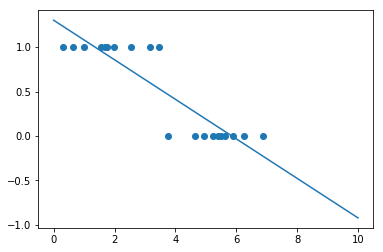

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1) 

plt.scatter(xs, labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
w = tf.Variable([0., 0.], name = "parametrs")

def model(X, w):
    return tf.add(tf.multiply(w[1], X),w[0]) # y = w1 * x + w0

y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _, current_cost = sess.run([train_op, cost], feed_dict = {X:xs, Y:labels})
        if epoch % 100 == 0:
            print(epoch, current_cost)
            
    correct_prediction = tf.equal(Y, tf.cast(tf.greater(y_model, 0.5), tf.float32))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    w_val, accuracy_val = sess.run([w, accuracy], feed_dict = {X:xs, Y:labels})              
    print("learning parameters %a, acuracy %f" % (w_val, accuracy_val))
    
all_xs = np.linspace(0, 10, 100)    
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.show()
    
    

0 0.693146
100 0.434723
200 0.323449
300 0.263958
400 0.227082
500 0.201921
600 0.183591
700 0.169595
800 0.158525
900 0.149526
learning parameters array([  1.47178827e-04,   6.22991621e-01], dtype=float32), acuracy 0.981000


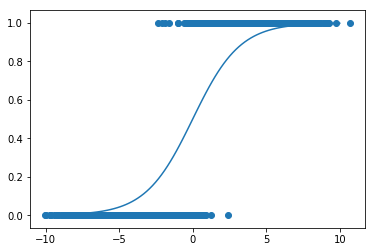

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.001
training_epochs = 1000

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2)) 

def sigmoid(x):
    return 1. / (1. + np.exp(-x)) 

plt.scatter(xs, ys)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
w = tf.Variable([0., 0.], name = "parametrs")
y_model = tf.sigmoid(w[1] * X + w[0])

cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _, current_cost = sess.run([train_op, cost], feed_dict = {X:xs, Y:ys})
        if epoch % 100 == 0:
            print(epoch, current_cost)
            
    correct_prediction = tf.equal(Y, tf.cast(tf.greater(y_model, 0.5), tf.float32))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    w_val, accuracy_val = sess.run([w, accuracy], feed_dict = {X:xs, Y:ys})              
    print("learning parameters %a, acuracy %f" % (w_val, accuracy_val))
    
all_xs = np.linspace(-10, 10, 100)    
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.show()

0 0.142121
200 0.142121
400 0.142121
600 0.142121
800 0.142121
1000 0.142121
1200 0.142121
1400 0.142121
1600 0.142121
1800 0.142121


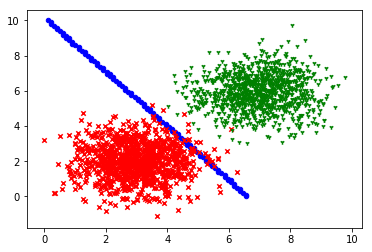

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.1
training_epochs = 2000

x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x2_label1)
x2s = np.append(x1_label2, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2)) 

X1 = tf.placeholder(tf.float32)
X2 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
w = tf.Variable([0., 0., 0.], name = "parametrs")

y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
#cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - Y) * (1 - y_model)))
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _, err = sess.run([train_op, cost], feed_dict = {X1:x1s, X2:x2s, Y:ys})
        if epoch % 200 == 0:
            print(epoch, current_cost)
    w_val = sess.run(w, feed_dict = {X1:x1s, X2:x2s, Y:ys})        

def sigmoid(x):
    return 1. / (1. + np.exp(-x))     
    
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test * w_val[2] - x1_test * w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
    
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()
